In [15]:
import numpy as np
import pandas as pd
%matplotlib inline


import numpy as np

import pandas as pd
import numpy as np
import  seaborn as sns
import rwi as rwi
import math
import  seaborn as sns
from matplotlib import pyplot as plt

In [8]:
import hurst

In [678]:
def MomersionDouble(df_):

    #df = df[df!=0.0]
    shift_returns = df_.shift(1).fillna(0)
    shift_returns2 = df_.shift(2).fillna(0)
    shift_returns3 = df_.shift(3).fillna(0)
    Pattern = np.sign(shift_returns * shift_returns2)
    Pattern2= np.sign(shift_returns2 * shift_returns3)
    df_ = df_.fillna(0) #df.dropna()

    pp = len(np.where( (Pattern == 1 ) & (Pattern2 == 1 ) )[0])
    pm = len(np.where( (Pattern == 1 ) & (Pattern2 == -1 ) )[0])
    mp = len(np.where( (Pattern == -1 ) & (Pattern2 == 1 ) )[0])
    mm = len(np.where( (Pattern == -1 ) & (Pattern2 == -1 ) )[0])

    total = 50+100*(pp+pm-mp-mm)/(pp + pm + mp+ mm)
    #threshUp = total>=np.sqrt(len(df))

    return total #(total, len(df), np.sqrt(len(df)))

def MomersionDouble_2(df_):

    #df = df[df!=0.0]
    shift_returns = df_ #.shift(1).fillna(0)
    shift_returns2 = df_.shift(1).fillna(0)
    shift_returns3 = df_.shift(2).fillna(0)
    Pattern = np.sign(shift_returns * shift_returns2)
    Pattern2= np.sign(shift_returns2 * shift_returns3)
    df_ = df_.fillna(0) #df.dropna()

    pp = len(np.where( (Pattern == 1 ) & (Pattern2 == 1 ) )[0])
    pm = len(np.where( (Pattern == 1 ) & (Pattern2 == -1 ) )[0])
    mp = len(np.where( (Pattern == -1 ) & (Pattern2 == 1 ) )[0])
    mm = len(np.where( (Pattern == -1 ) & (Pattern2 == -1 ) )[0])
    
    val = Pattern * Pattern2
    
    pos = len(val[val == 1])
    neg = len(val[val == -1])
    if pos + neg == 0:
        return 0
    
    mom = (pos/(pos+neg)) * 100.0

    return mom #(total, len(df), np.sqrt(len(df)))



In [464]:
def Momersion(df_):
    #print(np.where(df == 1)[0])
    #df = df['returns'].copy() * df['returns'].shift(1)
    df_ = df_.copy() * df_.shift(1)
    
    df_ = df_.fillna(0) #df.dropna()
    df_ = np.sign(df_)
    pos = len(np.where(df_ == 1)[0])
    neg = len(np.where(df_ == -1)[0])
    #zero = len(np.where(df == 0.0)[0])
    if (pos + neg) == 0.0:
        return -1.0
    #print(pos, neg)
    mom = (pos / (pos+neg )) *100.0
    return mom

In [72]:
win = 50
persistent = hurst.random_walk(2000, proba=0.7, min_lookback=win, max_lookback=win)

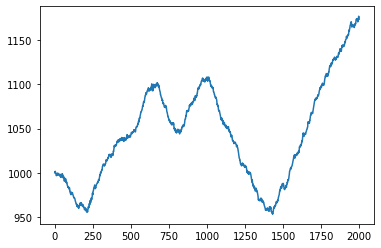

In [73]:
plt.plot(1000+pd.Series(persistent))

In [74]:
MomersionDouble((2000.0+pd.Series(persistent)).pct_change())

65.03006012024048

In [254]:
Momersion((2000.0+pd.Series(persistent)).pct_change())

0.575075075075075

In [82]:
ts = 100.0 + pd.Series( persistent)

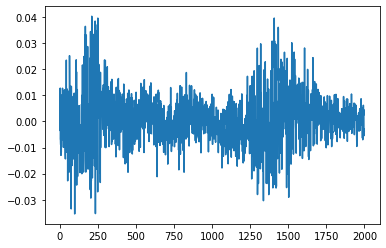

In [83]:
ts.pct_change().dropna().plot()

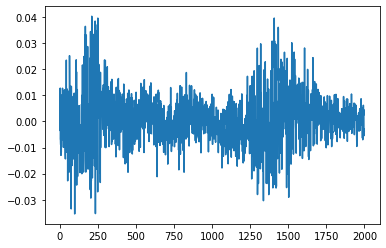

In [84]:
plt.plot(ts.pct_change())

In [64]:
ts

0        1000.000000
1         998.244127
2         999.807170
3         999.512370
4         997.690786
            ...     
99994    4155.417697
99995    4157.373086
99996    4156.609700
99997    4157.123076
99998    4157.483054
Length: 99999, dtype: float64

In [88]:
n = 50
curr = 1000

In [89]:
curr_day = ts[curr]

In [90]:
n_day = ts[curr-50]

In [91]:
prev_n_day = ts[curr-50 * 2]

In [92]:
curr_day, n_day, prev_n_day

(208.4646442484426, 196.81584360426837, 179.56663821713067)

In [95]:
ret = ts.pct_change().dropna()

In [96]:
ret[1000]

0.010393602233743193

In [97]:
ret[1000-50]

7.180347542523613e-05

In [98]:
ret[1000-100]

0.004367880743892716

In [100]:
ts.pct_change(50).fillna(0)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.021989
1996    0.024505
1997    0.017354
1998    0.017446
1999    0.018956
Length: 2000, dtype: float64

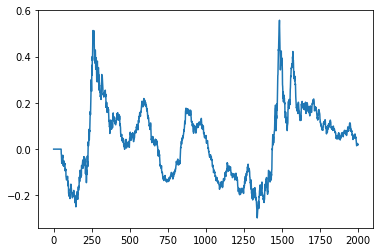

In [106]:
plt.plot(ts.pct_change(50).fillna(0))

In [176]:
a = ts.pct_change(50).fillna(0)

In [177]:
b = ts.pct_change(50).shift(50).fillna(0)

In [178]:
a.shape

(2000,)

In [179]:
b.shape

(2000,)

In [180]:
df = pd.concat([a, b], axis=1)

In [198]:
df.reset_index(drop=True).iloc[900]

0    0.164240
1    0.049916
Name: 900, dtype: float64

In [209]:
np.sign(a*b)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Length: 2000, dtype: float64

In [226]:
ts

0       100.000000
1       100.720008
2       100.368523
3       101.647407
4       100.950478
           ...    
1995    276.197227
1996    277.121820
1997    275.604584
1998    274.786719
1999    273.801405
Length: 2000, dtype: float64

In [385]:
def momersionPeriod_bin(ts_, p_):
    ts_1 = ts_.pct_change(p_).fillna(0)
    ts_2 = ts_.pct_change(p_).shift(50).fillna(0)
    
    return np.sign(ts_1 * ts_2)

def momersionPeriod(ts_, p_):
    ts_1 = np.sign(ts_.pct_change(p_).fillna(0))
    ts_2 = np.sign(ts_.pct_change(p_).shift(p_).fillna(0))
    
    val = ts_1 * ts_2
    pos = len(val[val == 1])
    neg = len(val[val == -1])
    if pos + neg == 0:
        return 0
    
    mom = (pos/(pos+neg)) * 100.0
    return mom

In [424]:
def momersionOne(ts_):
    ts_1 = np.sign(ts_.pct_change().fillna(0))
    ts_2 = np.sign(ts_.pct_change().shift(1).fillna(0))
    
    val = ts_1 * ts_2
    pos = len(val[val == 1])
    neg = len(val[val == -1])
    if pos + neg == 0:
        return 0
    
    mom = (pos/(pos+neg)) * 100.0
    return mom

In [573]:
def momersionTwo(ts_):
    ts_1 = np.sign(ts_.pct_change().fillna(0))
    ts_2 = np.sign(ts_.pct_change().shift(1).fillna(0))
    ts_3 = np.sign(ts_.pct_change().shift(2).fillna(0))
    
    val = ts_1 * ts_2
    val2 = ts_2 * ts_3
    val = val * val2
    pos = len(val[val == 1])
    neg = len(val[val == -1])
    if pos + neg == 0:
        return 0
    
    mom = (pos/(pos+neg)) * 100.0
    return mom

In [327]:
ts_ = ts
p_ = 50
ts_1 = np.sign(ts_.pct_change(p_).fillna(0))
ts_2 = np.sign(ts_.pct_change(p_).shift(50).fillna(0))

val = ts_1 * ts_2


In [421]:
ts.pct_change(1)

0       0.007200
1      -0.003490
2       0.012742
3      -0.006856
4      -0.006995
          ...   
1995    0.003348
1996   -0.005475
1997   -0.002968
1998   -0.003586
1999         NaN
Length: 2000, dtype: float64

In [329]:
pos = len(val[val == 1])

In [330]:
pos

1648

In [331]:
neg = len(val[val == -1])

In [332]:
neg

252

In [333]:
(pos/(pos+neg)) * 100.0

86.73684210526315

In [ ]:
pos = len(val[val == 1])
neg = len(val[val == -1])
if pos + neg == 0:
    return 0
print(neg)
mom = (pos/(pos+neg)) * 100.0

26
27
27
26
26
26
26
26
27
27
27
28
28
27
26
26
26
26
26
25
25
25
26
26
26
25
24
24
24
23
24
24
23
22
22
22
21
20
19
18
18
18
18
19
18
18
19
19
19
20
20
20
20
20
19
18
17
16
17
18
18
17
17
18
18
19
19
19
19
19
18
18
18
18
17
17
16
16
17
18
19
20
20
20
20
20
19
18
17
16
16
16
15
14
14
13
14
14
14
15
16
16
17
18
17
16
16
16
15
15
15
14
14
14
13
13
13
14
15
15
16
17
18
18
18
18
17
17
18
18
18
18
19
19
19
20
21
22
22
23
22
23
22
22
22
21
20
20
20
20
20
21
22
23
24
24
24
25
25
26
26
26
27
27
27
27
26
26
26
26
25
24
24
23
23
24
25
26
25
26
27
27
27
26
26
26
27
27
28
28
28
28
28
29
29
29
30
29
28
27
27
26
26
25
25
24
24
23
22
21
20
20
20
19
19
20
20
20
20
21
21
20
19
18
18
17
16
15
14
14
14
13
12
12
12
13
14
14
14
13
13
12
12
12
12
12
11
11
10
11
11
12
12
12
13
13
14
14
14
14
13
12
12
12
12
11
10
10
10
10
10
10
11
12
12
12
12
13
14
13
12
11
10
11
11
12
11
11
10
10
10
11
12
13
14
14
15
15
16
16
15
15
15
16
17
18
18
18
18
18
19
19
19
20
21
22
23
24
23
23
23
24
25
25
24
24
24
25
26
25
25
24
24
2

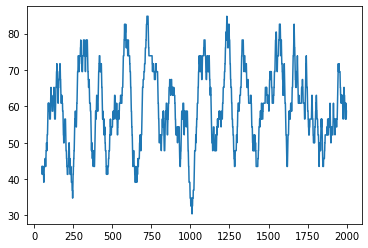

In [339]:
ts.rolling(50).apply(momersionPeriod, args=[2]).plot()

In [318]:
test = momersionPeriod(ts, 2)

1095


In [202]:
### numpy version
result = []
period = 50
for n in range(period*2, len(a)):
    val1 = a[n]
    val2 = a[n-period]

    val = np.sign(val1) * np.sign(val2)
  
    result.append(val)
    
result = []
period = 50
for n in range(period*2, len(a)):
    val1 = a[n]
    val2 = a[n-period]

        
    
    result.append((n, val1, val2))
        
  

In [516]:
df = pd.DataFrame(ts, columns=['ts'])

In [517]:
df['returns'] = df.ts.pct_change().fillna(0)

In [518]:
df['momersion'] = df[['returns']].rolling(50).apply(Momersion, raw=False)

In [519]:
df['momersionDouble'] = df[['returns']].rolling(50).apply(MomersionDouble, raw=False)

In [529]:
df['momersionDouble_2'] = df[['returns']].rolling(50).apply(MomersionDouble_2, raw=False)

In [586]:
df['mom_1'] = df[['ts']].rolling(50).apply(momersionPeriod, args=[2], raw=False)

In [527]:
df['mom_One'] = df[['ts']].rolling(50).apply(momersionOne, raw=False)

In [576]:
df['mom_Two'] = df[['ts']].rolling(50).apply(momersionTwo, raw=False)

In [560]:
def autoCorrel(df, lag):
    return pd.Series.autocorr(df, lag) * 100.0 + 50.0

In [580]:
df['correl_1'] = np.sign(df[['returns']]).rolling(10).apply(autoCorrel, args=[1])

In [581]:
df['correl_2'] = np.sign(df[['returns']]).rolling(50).apply(autoCorrel, args=[2])

In [582]:
df['correl_3'] = np.sign(df[['returns']]).rolling(50).apply(autoCorrel, args=[3])

In [583]:
df['correl_4'] = np.sign(df[['returns']]).rolling(50).apply(autoCorrel, args=[4])

In [ ]:
correl_1 = autoCorrel(df.returns, 1)
correl_2 = autoCorrel(df.returns, 2)
correl_3 = autoCorrel(df.returns, 3)
correl_4 = autoCorrel(df.returns, 4)

In [523]:
momersionOne(ts[0:1000].pct_change())

51.955867602808425

In [575]:
momersionTwo(ts[0:1000].pct_change())

60.14056224899599

In [513]:
momersionPeriod(ts[0:1000], 2)

58.032128514056225

In [508]:
Momersion(ts[0:1000].pct_change())

55.11022044088176

In [514]:
MomersionDouble(ts[0:1000].pct_change())

60.33099297893681

In [515]:
MomersionDouble_2(ts[0:1000].pct_change())

56.36910732196589

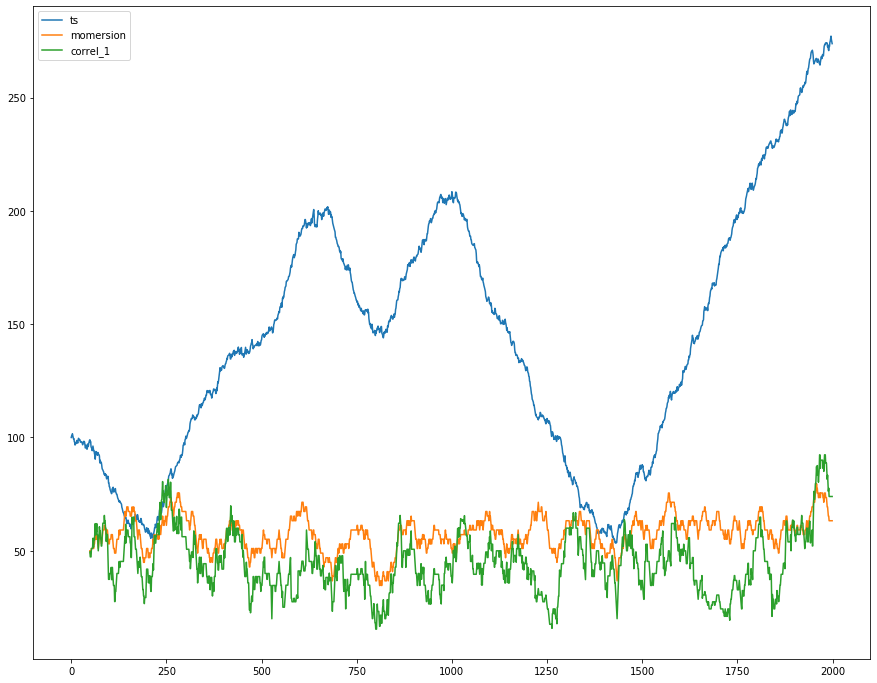

In [662]:
df[[ 'ts', 'momersion',  'correl_1', ]].plot(figsize=(15,12))

In [588]:
df[['momersion', 'momersionDouble', 'momersionDouble_2','mom_1', 'mom_One', 'mom_Two',  'correl_1', 'correl_2', 'correl_3', 'correl_4']].corr(method='spearman')

,momersion,momersionDouble,momersionDouble_2,mom_1,mom_One,mom_Two,correl_1,correl_2,correl_3,correl_4
momersion,1.000000,0.988943,0.494580,0.537227,0.988953,0.492549,0.510777,0.021376,-0.122807,-0.065357
momersionDouble,0.988943,1.000000,0.492202,0.539119,0.999995,0.492708,0.507864,0.020716,-0.121981,-0.065109
momersionDouble_2,0.494580,0.492202,1.000000,0.580487,0.492291,0.991489,-0.152944,0.718718,-0.041443,0.001462
mom_1,0.537227,0.539119,0.580487,1.000000,0.539184,0.585148,0.018957,0.248284,0.083229,0.099927
mom_One,0.988953,0.999995,0.492291,0.539184,1.000000,0.492796,0.507774,0.020801,-0.121975,-0.065190
mom_Two,0.492549,0.492708,0.991489,0.585148,0.492796,1.000000,-0.151135,0.712298,-0.042099,-0.002490
correl_1,0.510777,0.507864,-0.152944,0.018957,0.507774,-0.151135,1.000000,-0.121162,-0.115679,-0.031896
correl_2,0.021376,0.020716,0.718718,0.248284,0.020801,0.712298,-0.121162,1.000000,-0.090217,-0.029912
correl_3,-0.122807,-0.121981,-0.041443,0.083229,-0.121975,-0.042099,-0.115679,-0.090217,1.000000,-0.175994
correl_4,-0.065357,-0.065109,0.001462,0.099927,-0.065190,-0.002490,-0.031896,-0.029912,-0.175994,1.000000


In [593]:
import matplotlib.pyplot as plot

(array([-200, -199, -198, -197, -196, -195, -194, -193, -192, -191, -190,
        -189, -188, -187, -186, -185, -184, -183, -182, -181, -180, -179,
        -178, -177, -176, -175, -174, -173, -172, -171, -170, -169, -168,
        -167, -166, -165, -164, -163, -162, -161, -160, -159, -158, -157,
        -156, -155, -154, -153, -152, -151, -150, -149, -148, -147, -146,
        -145, -144, -143, -142, -141, -140, -139, -138, -137, -136, -135,
        -134, -133, -132, -131, -130, -129, -128, -127, -126, -125, -124,
        -123, -122, -121, -120, -119, -118, -117, -116, -115, -114, -113,
        -112, -111, -110, -109, -108, -107, -106, -105, -104, -103, -102,
        -101, -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,
         -90,  -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,
         -79,  -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,
         -68,  -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,
         -57,  -56,  -55,  -54,  -53, 

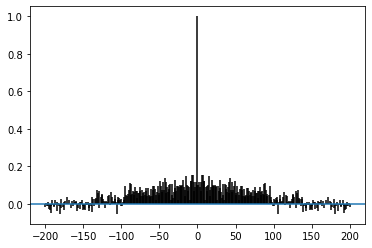

In [699]:
plot.acorr(df['ts'].pct_change().fillna(0), maxlags=200 )

In [599]:
import statsmodels.api as sm

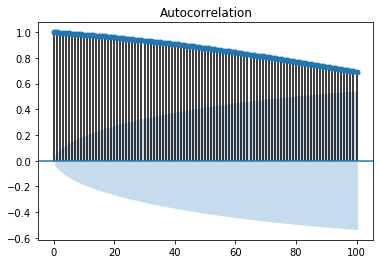

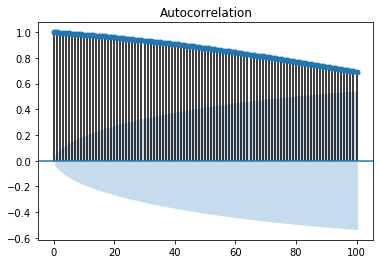

In [693]:
sm.graphics.tsa.plot_acf(df.ts.squeeze(), lags=100)

In [610]:
result = []
for i in range(1, 200):
    result.append(momersionPeriod(df.returns, i))

<BarContainer object of 199 artists>

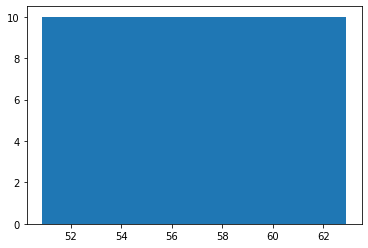

In [616]:
plt.bar(result, height = 10)

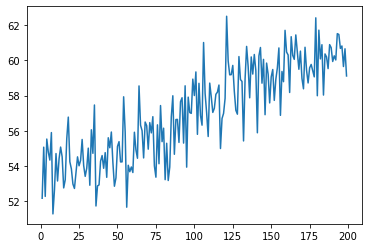

In [679]:
plt.plot([i for i in range(1,200)], result[:199])

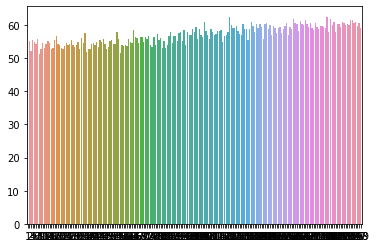

In [701]:
ax = sns.barplot(x=[i for i in range(1,200)], y=result, data=pd.Series(result[:200]))

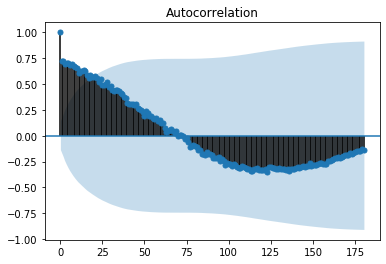

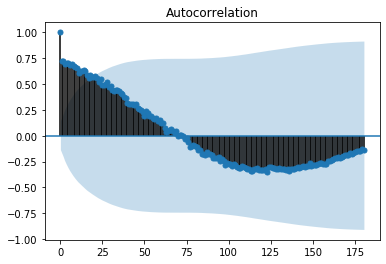

In [692]:
sm.graphics.tsa.plot_acf(pd.Series(result[:200]).fillna(0).fillna(0), lags=180)

In [632]:
import scipy.fftpack

In [642]:
xf

array([  0.        ,   4.08163265,   8.16326531,  12.24489796,
        16.32653061,  20.40816327,  24.48979592,  28.57142857,
        32.65306122,  36.73469388,  40.81632653,  44.89795918,
        48.97959184,  53.06122449,  57.14285714,  61.2244898 ,
        65.30612245,  69.3877551 ,  73.46938776,  77.55102041,
        81.63265306,  85.71428571,  89.79591837,  93.87755102,
        97.95918367, 102.04081633, 106.12244898, 110.20408163,
       114.28571429, 118.36734694, 122.44897959, 126.53061224,
       130.6122449 , 134.69387755, 138.7755102 , 142.85714286,
       146.93877551, 151.02040816, 155.10204082, 159.18367347,
       163.26530612, 167.34693878, 171.42857143, 175.51020408,
       179.59183673, 183.67346939, 187.75510204, 191.83673469,
       195.91836735, 200.        ])

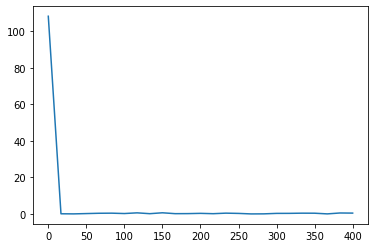

In [676]:
N = 50
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = np.asarray(pd.Series(result[:50]).fillna(0))
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [655]:
len(xf)

100

In [652]:
x

array([0.        , 0.00125628, 0.00251256, 0.00376884, 0.00502513,
       0.00628141, 0.00753769, 0.00879397, 0.01005025, 0.01130653,
       0.01256281, 0.0138191 , 0.01507538, 0.01633166, 0.01758794,
       0.01884422, 0.0201005 , 0.02135678, 0.02261307, 0.02386935,
       0.02512563, 0.02638191, 0.02763819, 0.02889447, 0.03015075,
       0.03140704, 0.03266332, 0.0339196 , 0.03517588, 0.03643216,
       0.03768844, 0.03894472, 0.04020101, 0.04145729, 0.04271357,
       0.04396985, 0.04522613, 0.04648241, 0.04773869, 0.04899497,
       0.05025126, 0.05150754, 0.05276382, 0.0540201 , 0.05527638,
       0.05653266, 0.05778894, 0.05904523, 0.06030151, 0.06155779,
       0.06281407, 0.06407035, 0.06532663, 0.06658291, 0.0678392 ,
       0.06909548, 0.07035176, 0.07160804, 0.07286432, 0.0741206 ,
       0.07537688, 0.07663317, 0.07788945, 0.07914573, 0.08040201,
       0.08165829, 0.08291457, 0.08417085, 0.08542714, 0.08668342,
       0.0879397 , 0.08919598, 0.09045226, 0.09170854, 0.09296

In [714]:
rwi.marketMeannes(ts.fillna(0))

0.46473236618309155

In [702]:
ts

0       100.000000
1       100.720008
2       100.368523
3       101.647407
4       100.950478
           ...    
1995    276.197227
1996    277.121820
1997    275.604584
1998    274.786719
1999    273.801405
Length: 2000, dtype: float64